# Indmat prosjekt
###### Liva Berge Flo, André Pettersen-Dahl, Herman Neple

#### Introduksjon
Kunstig intelligens har den siste tiden vært i vinden. Spesielt populære er modeller som ChatGPT. Disse type modellene som i bunn og grunner predikerer neste del av en sekvens, bruker det som heter en transformermodell. I dette prosjektet vil vi forsøke å bygge en transformermodell fra bunnen av ved hjelp av python og biblioteket numpy. Vi vil også forhåpentligvis underveis i denne prosessen forstå om KI virkelig er noe å frykte, eller om det bare er lineær algebra.

#### Oppgave 1

1.1

En transformermodell skal trenes opp til å forsøke å predikere et heltall $d$, hvor $d = a \cdot b + c$, hvor $a$ og $c$ er tosifrede heltall og $b$ er et ettsifret heltall. Vi kan se på et eksempel på et datasett som kan brukes for å trene opp modellen.

Vi kan la
\begin{align*}
       a = 28,  
 b = 4,   c = 18,   d = 130, \\
\end{align*}
Input $x$ vil være tallene $a$, $b$ og $c$. I tillegg vil de to første sifrene i $d$ være inkludert i input, fordi vi ønsker at transformermodellen skal trenes opp til å finne det siste sifferet i $d$. Output $y$ vil være tallet $d$ som man ønsker å predikere. Dermed har vi altså

\begin{align*}
    x &= [2,8,4,1,8,1,3] \quad \text{og} \quad y = [1,3,0] \\
\end{align*}

1.2

Videre ser vi på et eksempel på hvordan transformermodellen $f_{\theta}$ kan predikere tallet $d$ for samme type problem.

Vi setter $a = 18, b = 3, c = 22.\\$
Et nytt siffer vil predikeres for hver gang vi sender $x$ inn i transformermodellen. Siste element i prediksjonen vil så bli lagt til i $x$, hvor de andre elementene i prediksjonen blir forkastet. Deretter sender vi $x$-en med det nye elementet inn i modellen på nytt. 

Prosessen vil dermed se slik ut:
\begin{align*}
    x^{(0)} &= [1,8,3,2,2], & [\hat{z}_{0}^{(0)},\hat{z}_{1}^{(0)},\hat{z}_{2}^{(0)},\hat{z}_{3}^{(0)},\hat{z}_{4}^{(0)},\textcolor{red}{\hat{z}_{5}^{(0)}}] = f_\theta(x^{(0)}), \\
    x^{(1)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}}], & [\hat{z}_{0}^{(1)},\ldots, \textcolor{blue}{\hat{z}_{6}^{(1)}}] = f_\theta(x^{(1)}), \\ 
    x^{(2)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}}], & [\hat{z}_{0}^{(1)},\ldots, \textcolor{gold}{\hat{z}_{7}^{(2)}}] = f_\theta(x^{(2)}), \\
    x^{(3)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}},\textcolor{gold}{\hat{z}_{7}^{(2)}}] \\
    \hat{y} &= [\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}},\textcolor{gold}{\hat{z}_{7}^{(2)}}]. \\
\end{align*}

Om parameterne $\theta$ er riktig optimert, ønsker vi altså at rekkefølgen $\textcolor{red}{\hat{z}_{5}^{(0)}}\textcolor{blue}{\hat{z}_{6}^{(1)}}\textcolor{gold}{\hat{z}_{7}^{(2)}} = 076 = d$

1.3

La $m = 5$ og $y = [4,3,2,1]$. Vi bruker cross-entropy som objektfunksjon $\mathcal{L}$, og ønsker å finne en sannsynlighetsfordeling $\hat Y$ som gir $\mathcal{L}(\theta, \mathcal{D}) = 0$.

I vårt tilfelle vil dette se slik ut:


\begin{align*}
\mathcal{L}(\theta, \mathcal{D}) &= -\frac{1}{4} \sum_{i=0}^{0} \sum_{j=0}^{4} \log \hat Y_{kj}^{(i)}
\end{align*}

hvor det i ytre løkke kun summeres opp til $D = 0$, siden vi kun har ett datasett. I indre løkke summeres det opp til $n = 4$, fordi vi har 4 kolonner i $y$. For hver kolonne er indeksen $k$ gitt av hvilken rad som er «riktig» ifølge $y$.

Siden vi ønsker at $\mathcal{L}(\theta, \mathcal{D}) = 0$, vil vi at alle $Y_{kj}^{(i)} = 1$, slik at logaritmen av dette blir $0$. Vi velger altså en sannsynelighetsfordeling $\hat Y$ der elementene er $1$ i rad $k$ for hver kolonne.

Vi får altså:



$$\hat Y = \left[
\begin{array}{cccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 
\end{array}
\right]$$

Dette gjør at:


\begin{align*}
Y_{4,0} &= 1 \\
Y_{3,1} &= 1 \\
Y_{2,2} &= 1 \\
Y_{1,3} &= 1 \\
\end{align*}

Vi kan videre forenkle uttrykket for objektfunksjonen:

$$\mathcal{L}(\theta, \mathcal{D}) = -\frac{1}{4} \left( \log Y_{4,0} + \log Y_{3,1} + \log Y_{2,2} + \log Y_{1,3} \right) \\$$
$$= -\frac{1}{4} \left( \log 1 + \log 1 + \log 1 + \log 1 \right) = -\frac{1}{4} \cdot 4 \cdot \log 1 \\$$
$$= -\frac{4}{4} \cdot 0 = 0$$


Altså har vi at $ \mathcal{L}(\theta, \mathcal{D}) = 0 $.

Vi må i dette tilfellet ha at $\hat y = y = [4,3,2,1]$. Dette kan man se dersom man utfører operasjonen $\text{argmax}_{\text{col}}(\hat Y)$. Det kan også lett observeres ut fra at $\hat Y = Y$.

1.4

Det kan beregnes hvor mange enkeltparametre som inkluderes i transformermodellen. Vi kan begynne med å se på settet av parametere
\begin{align*}
\theta = \{ W_E, W_P, W_U, \{W_O^{(l)}, W_V^{(l)}, W_Q^{(l)}, W_K^{(l)}, W_1^{(l)}, W_2^{(l)}\}_{l=0}^{L-1} \}
\end{align*}
Med $L$ lag, og dimensjoner $d$, $m$, $n_{max}$, $k$ og $p$, vil antallet enkeltparametere $w$, som må bestemmes ved optimering, bli

\begin{align*}
w &=  d \cdot m + d \cdot n_{\text{max}} + d \cdot m + L\cdot \{ 4 ( k \cdot d ) + 2 (p\cdot d)\} \\
&= 2(d\cdot m) + d\cdot n_{\text{max}} + L\cdot \{ 4 ( k \cdot d ) + 2 (p\cdot d)\}
\end{align*}

1.5

Vi ønsker å vise at man må ha $\alpha > 1$ for å få $\hat{z} = [1]$ når input er $x = [1]$ og $n = n_{max} = 1, m = d = k = p = 2$ og $L = 1$. Vi kan starte med å gå manuelt gjennom hele transformeralgoritmen med de gitte verdiene. De første stegene gjøres i embedding.

$$x = [1], \quad m = 2 \\
X = \text{onehot}(x) = 
\begin{bmatrix}
0 \\
1 \\
\end{bmatrix} \\$$

$$W_{E} = \begin{bmatrix}
    1 & 0 \\
    0 & \alpha \\
\end{bmatrix}
W_{P} = \begin{bmatrix}
    1  \\
    0  \\
\end{bmatrix} \\$$
$$z_{0} = \begin{bmatrix}
    1 & 0 \\
    0 & \alpha \\
\end{bmatrix}
\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix} + \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
= \begin{bmatrix}
    0 \\
    \alpha \\
\end{bmatrix}
+ \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
= \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} \\$$


Videre utføres attention-laget.

$$z_{\frac{1}{2}} = z_0 + W_{O}^{T}W_{V}z_{0}A(z_{0})$$
$$ = z_{0} + W_{O}^{T}W_{V}z_{0}\text{ softmax}_{\text{col }}(z_{0}^{T}W_{Q}^{T}W_{K}z_{0} + D)$$
$$= \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix} + \begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix} \begin{bmatrix}
    1 & 0 \\
    1 & 1 \\
\end{bmatrix} \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} \text{softmax}_{\text{col } }(\begin{bmatrix}
    1 & \alpha
\end{bmatrix}\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} + 0) \\$$

$$= \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}+\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}\text{softmax}_{\text{col }}(1+\alpha^2)
= 2 \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}$$

Deretter utføres feed-forward-laget.

$$z_1 = z_{\frac{1}{2}} + W_{2}^{T}\sigma(W_1 z_{\frac{1}{2}})\\$$
$$= 2\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} + W_{2}^{T}\text{max}(0,W_1 z_{\frac{1}{2}})\\$$
$$= 2\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}+\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\text{max}\Bigg(0, \begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}2\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}\Bigg)\\$$
$$= 4\begin{bmatrix}
    1\\
    \alpha \\
\end{bmatrix}$$

Deretter benyttes $\text{softmax}_{\text{col}}$ for å finne sannsynlighetsfordelingen.

$$Z = \text{softmax}_{\text{col}}(W_{U}^{T}z_{1})\\$$
$$= \text{softmax}_{\text{col}}\bigg(4\begin{bmatrix}
        1 \\
        \alpha \\
    \end{bmatrix}\bigg)\\$$
$$= \frac{1}{e^{4}+e^{4\alpha}}\begin{bmatrix}
        e^{4} \\
        e^{4\alpha} \\
    \end{bmatrix}$$

Det kan observeres at $\text{argmax}_{\text{col}}(Z)$ vil returnere $\hat{z} = [1]$ dersom $Z_{10}$ er størst. Vi må altså ha at
\begin{align*}
e^{4\alpha} > e^{4} \implies \alpha > 1\\
\Box
\end{align*}

#### Oppgave 2

2.1

$\texttt{NeuralNetwork}$ utnytter arven som er mellom $\texttt{Layers}$ og dens underklasser. Ved at alle lag i det nevrale nettverket er underklasser av $\texttt{Layers}$, kan vi behandle alle lag «likt». Her utnyttes altså det faktumet at hvert lag har mye av de samme funksjonalitetene. Dette kalles polymorfisme. Dette forenkler og generaliserer nettverket vårt, og gjør at vi enkelt kan bruke samme kode for å lage nettverk som er strukturert ulikt og bygd opp med ulike typer lag. 

$ \texttt{step\_gd} $ funksjonen i $\texttt{NeuralNetwork}$ bruker funksjonen $\texttt{isinstance}$ for å kun utføre gradient descent på de underklassene av $\texttt{Layers}$ som faktisk har parametere vi ønsker å oppdatere. Et annet alternativ ville da vært å holde en liste på hvilke lag som vi ønsker å oppdatere parametere på, men dette hadde vært mer krunglete, siden vi da må vite noe om strukturen til det spesifikke nettverket.

2.2

Implementeringen av funksjonene skjer i layers.py. Vi gir en oppsumering av det vi har tenkt for de ulike lagene.

$\texttt{Softmax}$

Her har vi fulgt Appendix A og tips gitt i oppgaveteksten. 

$\texttt{Cross-entropy}$

Ettersom $y$ kan ha, og som oftest har, mindre lengde enn sannsynlighetsfordelingen man får ut fra nettverket, slicer vi $Z$ utfra lengden til $y$. Dette gjør også at vi må «padde» $\hat y$ matrisen i backward funksjonen, slik at den får samme dimensjon som $Z$ når den går bakover i nettverket.

Ellers følges Appendiks A i utregningene.

$\texttt{Unembedding}$

Her velger vi å implementere laget som et lineært lag som tar input-matrisen fra lengde d til m.

$\texttt{Attention}$

Her velger vi å implementere $W_V$ og $W_O$ som lineære lag innad i attention laget, der $W_O$ blir lagret som 
transponert. Ellers blir $W_K$ og $W_Q$ definert i Attention-laget.

2.3

Implementeringen av ADAM gjøres ved at matrisene $M$ og $V$ lagres sammen med paramterene og $G$ i params ordboken innad i lagene.

#### Oppgave 3.1

In [1]:
#Importerer nødvendige bibliotek
from layers import *
from neural_network import NeuralNetwork
from utils import *
import numpy as np
from data_generators import get_train_test_sorting
import matplotlib.pyplot as plt

For å teste om lagene vi har implementert fungerer, kan vi manuelt kjøre gjennom algoritmen. Vi starter med å initalisere lagene til det nevrale nettverk.

In [2]:
#definerer variabler
r = 4
m = 4
n = 3

d = 10
k = 5
p = 15
L = 2

embed = EmbedPosition(9,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

Vi kan videre gi nettverket vårt en input, la oss f.eks late som vi prøver å få modellen til å sortere tallene.

In [3]:
x = np.array([[0,1,2]])
X = onehot(x, m)

z0 = embed.forward(X)
z11 = att1.forward(z0)
z12 = ff1.forward(z11)
z2 = un_embed.forward(z12)
Z = softmax.forward(z2)

Det kan være nå nyttig å se om størrelsene og stegene er som forventet.

In [4]:
#Er X i onehot format?
print(f"Burde være i onehot-format:\n X:\n {X}")

#Sjekker shape av alle stegene.
print(f"Formen på hvert steg med b=1 :\n z0: burde ha shape (b, {d}, {n}). Den har shape: {z0.shape} \n z11: burde ha shape (b, {d}, {n}). Den har shape: {z11.shape} \n z12: burde ha shape (b, {d}, {n}). Den har shape: {z12.shape} \n z2: burde ha shape (b, {m}, {n}). Den har shape: {z2.shape}")

#Ser at ingen av elementene i Z er negative:
print(f"Z: \n {Z}")

#Sjekker om summen av kolonnene i Z er ca 1
print(f"Kolonnene i Z summert: {np.round(np.sum(Z, axis=1))}")


Burde være i onehot-format:
 X:
 [[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]
  [0. 0. 0.]]]
Formen på hvert steg med b=1 :
 z0: burde ha shape (b, 10, 3). Den har shape: (1, 10, 3) 
 z11: burde ha shape (b, 10, 3). Den har shape: (1, 10, 3) 
 z12: burde ha shape (b, 10, 3). Den har shape: (1, 10, 3) 
 z2: burde ha shape (b, 4, 3). Den har shape: (1, 4, 3)
Z: 
 [[[0.25597825 0.25592653 0.26161355]
  [0.25673452 0.25312274 0.26194715]
  [0.2491288  0.24568376 0.2367588 ]
  [0.2381584  0.24526694 0.23968048]]]
Kolonnene i Z summert: [[1. 1. 1.]]


Vi kan så teste om vi fikk riktig output, som i dette tilfelle burde være at det er $0$ på siste element. Om vi har riktig output skulle loss funksjonen vårt bli 0.

In [5]:
y = np.array([[0]])
L = loss.forward(Z,y)

print(L)

0.5823397686796951


Dette fungerte åpenbart ikke enda. Vi kan derfor prøve å trene nettverket et par runder. Vi starter da med å beregne den deriverte av loss funksjonen og kjøre en backward pass, før vi igjen kjører forward.

In [6]:
for i in range(4):
    dLdz = loss.backward()
    d0 = softmax.backward(dLdz)
    d1 = un_embed.backward(d0)
    d21 = ff1.backward(d1)
    d22 = att1.backward(d21)
    d3 = embed.backward(d22)

    z0 = embed.step_Adam(0.1, 0.9, 0.999, 10e-8)
    z11 = att1.step_Adam(0.1, 0.9, 0.999, 10e-8)
    z12 = ff1.step_Adam(0.1, 0.9, 0.999, 10e-8)
    z2 = un_embed.step_Adam(0.1, 0.9, 0.999, 10e-8)

    z0 = embed.forward(X)
    z11 = att1.forward(z0)
    z12 = ff1.forward(z11)
    z2 = un_embed.forward(z12)
    Z = softmax.forward(z2)



Vi kan nå se om backward har fungert og om vi har klart å optimalisere modellen.

In [7]:
#printer en av d matrisene og ser at de har blitt oppdatert
print(att1.params['wk']['d'])

#printer loss funksjonen på nytt og ser om den er blitt bedre
print(f"Loss etter 4 iterasjoner: {loss.forward(Z, y)}")

[[ 1.35048728e-03  5.22729791e-04 -1.39816889e-03 -1.84201787e-03
   4.06465448e-04  9.72813859e-04  8.27227730e-04  1.38353391e-03
   1.79592826e-03  1.73706302e-03]
 [ 2.95334796e-04  1.14314513e-04 -3.05762171e-04 -4.02826431e-04
   8.88889456e-05  2.12742310e-04  1.80904431e-04  3.02561684e-04
   3.92747207e-04  3.79874111e-04]
 [-2.45226325e-03 -9.49191507e-04  2.53884522e-03  3.34480213e-03
  -7.38074544e-04 -1.76647031e-03 -1.50210979e-03 -2.51227051e-03
  -3.26111097e-03 -3.15422136e-03]
 [ 9.85684219e-04  3.81526367e-04 -1.02048574e-03 -1.34443913e-03
   2.96668161e-04  7.10030582e-04  6.03771195e-04  1.00980406e-03
   1.31079957e-03  1.26783542e-03]
 [ 2.53761412e-03  9.82228059e-04 -2.62720957e-03 -3.46121776e-03
   7.63763182e-04  1.82795220e-03  1.55439063e-03  2.59970993e-03
   3.37461373e-03  3.26400384e-03]]
Loss etter 4 iterasjoner: 2.6898985864590656e-05


Vi kan se at lagene i nettverket virker å være riktig implementert. Vi får en lavere loss funksjon ved å utføre $\texttt{step\_adam}$, og parameterene virker å bli endret i backward passet.

#### Oppgave 3.2

Vi lager en generell funksjon som vil trene nettverket vårt. Denne funksjonen tar inn datasettet i batcher og gjennomfører Adam-steg for å optimalisere parametrene. Vi plotter også $\mathcal{L}^{i}$ for $i = 0,\dots , n_{iter} − 1$ med logaritmisk skala på y-aksen.


In [8]:
def test_Adam(nn: NeuralNetwork, loss, x_data, y_data, n_iters, step_size, m, start, stop):
    n_batches = x_data.shape[0]
    mean_losses = np.zeros(n_iters)
    for j in range(n_iters):
        losses = []
        for i in range(n_batches):
            x = x_data[i]
            y = y_data[i][:,start:stop] #Henter ut prediksjonsdataen
            #Forward pass
            X = onehot(x,m)
            Z = nn.forward(X)
            #Backward pass
            losses.append(loss.forward(Z,y))
            dLdZ = loss.backward()
            nn.backward(dLdZ)
            nn.step_Adam(step_size)
        mean_loss = np.mean(losses)
        print("Iterasjon ", str(j+1), " L = ",mean_loss, "")
        mean_losses[j] = mean_loss

    #Plotter loss-funksjonen per itterasjon i en logaritmisk skala
    plt.plot(np.arange(0,n_iters), np.log10(mean_losses))
    plt.xlabel("Iterasjonnummer")
    plt.ylabel("Logaritmen av loss-funksjon")
    plt.title("Optimering av loss-funksjonen")
    plt.figure(figsize=(20,25))
    plt.show()
    #Returnerer gjennomsnittet over objektfunksjonen over batchene
    return mean_losses

#### Oppgave 3.3

Nå som vi har implementert treningsalgoritmen vår og testet at lagene er riktig implementert, er vi klare til å trene nettverket vårt på et enkelt sorteringsproblem. Vi ønsker å trene nettverket ved å gi det usorterte tallsekvenser bestående av 5 sifre med verdi 0 eller 1, sammen med tilhørende sorterte datasett. Med korrekt konfigurert nettverk vil det kunne analysere treningsdataene og søke etter mønstre som det deretter kan bruke til å forutsi hvordan en usortert sekvens vil se ut når den er ferdig sortert.

In [9]:
#definerer variabler
r = 5
m = 2

d = 10
k = 5
p = 15
L = 2
#Implementerer 2 lag 
embed = EmbedPosition(9,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)
ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()
#Initialiserer nettverket
nn = NeuralNetwork([embed, att1, ff1, att2, ff2, un_embed, softmax])
#Henter ut data
data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=20, n_batches_test=4)
#Lagrer data for enklere bruk senere
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

Med lagene initialisert og treningsdataene innhentet, er det nå på tide å starte treningen av nettverket. Vi kjører nå treningsalgoritmen som beskrevet tidligere på treningsdataene vi har hentet fra $\texttt{get\_train\_test\_sorting}$-funksjonen. Deretter plotter vi og skriver ut tapet til objektsfunksjonen underveis.

Iterasjon  1  L =  0.29548789090065086 
Iterasjon  2  L =  0.282082241591645 
Iterasjon  3  L =  0.25734207604329407 
Iterasjon  4  L =  0.21323498647284858 
Iterasjon  5  L =  0.15633265828809648 
Iterasjon  6  L =  0.09704888227143947 
Iterasjon  7  L =  0.05241325470684886 
Iterasjon  8  L =  0.04661109636061868 
Iterasjon  9  L =  0.03230428517203645 
Iterasjon  10  L =  0.020734111437745995 
Iterasjon  11  L =  0.011842548411838577 
Iterasjon  12  L =  0.003538002413121609 
Iterasjon  13  L =  0.001829558897440352 
Iterasjon  14  L =  0.0007410556290341241 
Iterasjon  15  L =  0.00046313345918457156 
Iterasjon  16  L =  0.0003438452970454339 
Iterasjon  17  L =  0.00027973845762440915 
Iterasjon  18  L =  0.0002344028571336689 
Iterasjon  19  L =  0.000199977558310722 
Iterasjon  20  L =  0.00017289329230562282 
Iterasjon  21  L =  0.00015108913512015487 
Iterasjon  22  L =  0.00013323955716992682 
Iterasjon  23  L =  0.00011842502647256385 
Iterasjon  24  L =  0.00010598221820789

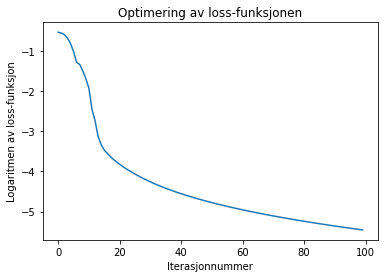

<Figure size 1440x1800 with 0 Axes>

In [10]:
losses = test_Adam(nn, loss, data['x_train'], data['y_train'], 100, 0.001, m, 4, 9)

Som vi ser, klarer vi å optimere nettverket ved at vi minimerer objektfunksjonen. Vi ser også hvordan det er en raskere endring i objektfunskjonen for de første iterasjonene, før den gradvis tilnærmer seg en minimumsverdi.

Tester for én iterasjon for å se om den greier å predikere neste verdi

In [11]:
x = np.array([[1, 0 ,0, 1, 0]])
X = onehot(x, m)

#forward pass
Z = nn.forward(X)
z_hat = np.argmax(Z, axis=1)

print(z_hat)

[[1 0 0 1 0]]


Når vi sender inn arrayet [[1, 0, 0, 1, 1]] i algoritmen, vil vi få den første predikerte verdien som det siste elementet i det returnerte arrayet, som beskrevet i avsnitt 1.2. Siden algoritmen sorterer verdiene i arrayet bestående av 0 og 1, forventer vi at det første sifferet i det sorterte arrayet blir 0. Deretter, for å predikere resten av sekvensen, mater vi inn det siste elementet i det predikerte arrayet tilbake inn i arrayet vi sender gjennom 'forward'-steget, og fortsetter prediksjonen derfra.

Videre har vi definert funksjonene $\texttt{predict}$ i $\texttt{NeuralNetwork}$ og $\texttt{countCorrect}$ i $\texttt{utils.py}$. $\texttt{predict}$ tar inn testdataen til det nevrale nettverket vårt og predikerer svarene ut ifra dataen, før $\texttt{countCorrect}$ sjekker hvor stor andel av prediksjonene som var riktige. Dermed kan vi se hvorvidt nettverket vårt klarer å sortere eller ikke.

In [12]:
#Kaller på prediksjonsfunksjonen
y_hats = nn.predict(x_test, 2, 5)
#Teller antall rette prediksjoner
tell = countCorrect_sort(y_hats, y_test)

Antall rette prediksjoner: 1000
Totalt antall prediksjoner: 1000
Prosentvis riktige predikasjoner: 100.0 %


Når to forskjellige verdier kan forekomme på fem ulike steder, resulterer dette i totalt $32$ mulige kombinasjoner $(2^5 = 32)$. Denne variasjonen gjør det praktisk talt umulig å teste algoritmen vår med nye sekvenser. Ideelt sett ville tapet ha tendert mot null, og prediksjonene ville vært korrekte hver gang, siden algoritmen burde gjenkjenne det riktige svaret $(y)$ i stedet for å forutsi neste sekvens. Hvis dette ikke skjer, kan det tyde på feil i det nevrale nettverket eller treningsdataen.

Nå som vi ser at det nevrale nettverket blir trent riktig, kan vi prøve å løse det samme problemet med tallsekvenser på lengde $7$ og tall fra $0$ til $4$.

In [13]:
#Initialiserer to lag og henter ny treningsdata likt som tidligere
#definerer variabler
r = 7
m = 5
n_max = 2*r-1

d = 20
k = 10
p = 25
L = 2
#Implementerer 2 lag
embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)

ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)

un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()
#Initialiserer nettverket
nn = NeuralNetwork([embed, att1, ff1, att2, ff2, un_embed, softmax])
#Henter data
data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=10, n_batches_test=4)
#Lagrer data for enklere senere bruk
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']


Trener modellen på den nye dataen for å optimere prediksjonene. Her har vi valgt steglengden 0.001 siden det har vist seg å gi gode resultater. Vi velger også å ikke stoppe treningen ved $\mathcal{L} < 0.01$, for å garantere et bedre resultat.

Iterasjon  1  L =  0.6937131650100311 
Iterasjon  2  L =  0.677705507910215 
Iterasjon  3  L =  0.6573056332108114 
Iterasjon  4  L =  0.6279617826234438 
Iterasjon  5  L =  0.584634923367463 
Iterasjon  6  L =  0.5258147874839245 
Iterasjon  7  L =  0.45463062304164736 
Iterasjon  8  L =  0.38533820040126426 
Iterasjon  9  L =  0.34136902497742666 
Iterasjon  10  L =  0.326360089694158 
Iterasjon  11  L =  0.31537052217126843 
Iterasjon  12  L =  0.30533679869707747 
Iterasjon  13  L =  0.2931101161085507 
Iterasjon  14  L =  0.27217122526808846 
Iterasjon  15  L =  0.2561181478781552 
Iterasjon  16  L =  0.24080317631198356 
Iterasjon  17  L =  0.23023315973075498 
Iterasjon  18  L =  0.21699953337177375 
Iterasjon  19  L =  0.21056069951796172 
Iterasjon  20  L =  0.20765793241493918 
Iterasjon  21  L =  0.20289990749899456 
Iterasjon  22  L =  0.20694524675581044 
Iterasjon  23  L =  0.20010057219405994 
Iterasjon  24  L =  0.19712402618242797 
Iterasjon  25  L =  0.182338036510298

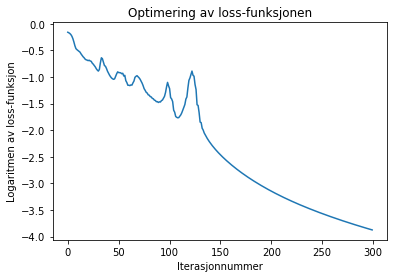

<Figure size 1440x1800 with 0 Axes>

In [14]:
losses = test_Adam(nn, loss, data['x_train'], data['y_train'], 300, 0.001, m, 6, 13)

Som vi ser går også loss-funksjonen her mot 0, men i en lavere grad enn tidligere. Dette kan indikere at nettverket vårt sliter litt mer med å stadfeste klare mønster og sammenhenger. Verdien er likevel lav nok til at vi burde forvente riktig prediksjon store deler av tiden. 

Vi kan derfor teste med noen enkle tilfeller for å bekrefte at vi får riktig prediksjon.

In [15]:
#Arrayene vi vil prøve å sortere
x_1 = np.array([[[3, 0, 4, 1, 4, 3, 2]]]) 
x_2 = np.array([[[4, 2, 2, 1, 2, 2, 4]]])
x_3 = np.array([[[1, 2, 0, 1, 3, 0, 4]]])

#Printer de opprinnelige usorterte arrayene med tilhørende sortert prediksjon
print(x_1[0,0], "->",(nn.predict(x_1, 5, 7))[0,0])
print(x_2[0,0], "->",(nn.predict(x_2, 5, 7))[0,0])
print(x_3[0,0], "->",(nn.predict(x_3, 5, 7))[0,0])

[3 0 4 1 4 3 2] -> [0 1 2 3 3 4 4]
[4 2 2 1 2 2 4] -> [1 2 2 2 2 4 4]
[1 2 0 1 3 0 4] -> [0 0 1 1 2 3 4]


Vi ser at nettverket vårt klarer å predikere riktig for disse tilfellene. Likevel kan det være fordelaktig å teste det med et større datasett for å få en dypere forståelse av nettverkets treningsnivå.

I motsetning til i forrige problem har vi nå flere mulige sekvenskombinasjoner enn det vi har trent på. $\texttt{get\_train\_test\_sorting}$-funksjonen leverer testdata som nettverket ikke har blitt eksponert for under treningen. Ved å bruke testdataen lar dette oss evaluere hvor godt nettverket vårt kan forutsi sortering av tall, da det blir testet på prediksjonsevnen, og ikke bare på gjenkjennelse av treningsdataen.

Vi velger dermed å teste nettverket på testdataen som består av $4$ batches med $250$ samples.

In [16]:
#Henter prediksjonsfunksjonen
y_hats = nn.predict(x_test, 5, 7)
#Finner andelen av riktige prediksjoner
tell = countCorrect_sort(y_hats, y_test)

Antall rette prediksjoner: 998
Totalt antall prediksjoner: 1000
Prosentvis riktige predikasjoner: 99.8 %


Også her ser vi at modellen vår er godt trent på å sortere riktig, selv med ny data og flere mulige kombinasjoner enn tidligere.

#### Oppgave 3.4

Nå som vi har demonstrert muligheten til å trene det nevrale nettverket til å sortere tall, ønsker vi å utforske om det kan lære enkel addisjon med to tosifrede tall. Denne tilnærmingen ligner på sorteringen, men her øker vi mengden treningsdata i håp om å oppnå en godt trent modell som kan forutsi riktig resultat store deler av tiden.

Vi starter med å initialisere 3 lag, definere nødvendige variabler og hente ut treningsdata.

In [17]:
from data_generators import get_train_test_addition
#definerer variabler
r = 4
m = 10
n_max = 3*r

d = 30
k = 20
p = 40
L = 3

#Lager 3 lag til nn
att1 = Attention(d,k)
att2 = Attention(d,k)
att3 = Attention(d,k)

ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)
ff3 = FeedForward(d,p)

embed = EmbedPosition(n_max,m,d)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

#Lager det nevrale nettverket på nytt
nn = NeuralNetwork([embed, att1, ff1, att2, ff2, att3, ff3, un_embed, softmax])
#implementerer trenignsdata. 2 siffer i tallene vi adderer, 20 batches med 250 samples per batch, og 4 batches vi kan teste med
data = get_train_test_addition(2, samples_per_batch=250,n_batches_train=20, n_batches_test=20)
#Henter ut data
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

Nå kan vi beregne, plotte og skrive ut tapet til objektsfunksjonen ved hver iterasjon ved hjelp av den samme funksjonen som tidligere.

Iterasjon  1  L =  0.9926128572884163 
Iterasjon  2  L =  0.9035114457482504 
Iterasjon  3  L =  0.8127345456225645 
Iterasjon  4  L =  0.7587591805048524 
Iterasjon  5  L =  0.7501619448354389 
Iterasjon  6  L =  0.7243287340336242 
Iterasjon  7  L =  0.6883254693065681 
Iterasjon  8  L =  0.6708336638327672 
Iterasjon  9  L =  0.6668490116821422 
Iterasjon  10  L =  0.665948087314036 
Iterasjon  11  L =  0.6651523149527749 
Iterasjon  12  L =  0.6640733752834596 
Iterasjon  13  L =  0.6621549613152469 
Iterasjon  14  L =  0.6595062085223375 
Iterasjon  15  L =  0.6546504793139526 
Iterasjon  16  L =  0.6502990186055059 
Iterasjon  17  L =  0.6505753733436073 
Iterasjon  18  L =  0.6425117595962524 
Iterasjon  19  L =  0.6298927560522808 
Iterasjon  20  L =  0.6109427719201641 
Iterasjon  21  L =  0.5990278703371019 
Iterasjon  22  L =  0.6012179433720977 
Iterasjon  23  L =  0.550013239877515 
Iterasjon  24  L =  0.519418685923577 
Iterasjon  25  L =  0.5089425944214303 
Iterasjon  2

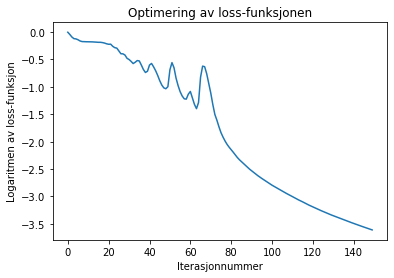

<Figure size 1440x1800 with 0 Axes>

In [18]:
#Beregner og skriver ut loss for hver itterasjon
losses = test_Adam(nn, loss, data['x_train'], data['y_train'], 150, 0.001, m, 3, 6)

Som vi ser fra figuren, blir tapet i objektsfunksjonen minsket over flere iterasjoner.

Vi kan nå evaluere vårt nevrale nettverk ved å mate det med enkelttilfeller og deretter observere om det faktisk klarer å forutsi riktig addisjon.

In [19]:
#Gir eksempler på arrays vi ønsker å predikere
x_1 = np.array([[[3, 0, 4, 1]]])
x_2 = np.array([[[4, 2, 9, 1]]])
x_3 = np.array([[[7, 2, 0, 1]]])

#Printfunksjoner for å printe hva vi ønsker å predikere summen av opp mot vår predikerte sum
print(x_1[0,0][:2], "+" ,x_1[0,0][2:], "=",np.flip(nn.predict(x_1, m, 3))[0,0])
print(x_2[0,0][:2], "+" ,x_2[0,0][2:], "=",np.flip(nn.predict(x_2, m, 3))[0,0])
print(x_3[0,0][:2], "+" ,x_3[0,0][2:], "=",np.flip(nn.predict(x_3, m, 3))[0,0])

[3 0] + [4 1] = [0 7 1]
[4 2] + [9 1] = [1 3 3]
[7 2] + [0 1] = [0 7 3]


Vi kan også utføre testing av nettverket vårt på testdataen vi uttrakk samtidig med treningsdataen. I dette tilfellet vil vi gjennomføre 5000 tester på dataene som modellen vår ikke har blitt trent på tidligere.

In [20]:
#Beregner antall riktige prediksjoner av testdataen opp mot testdataen
y_hats = nn.predict(x_test, 10, 3)
#Teller hvor mange prediksjoner som var riktig
Tell = countCorrect_add(y_hats, y_test)

Antall rette prediksjoner: 4998
Totalt antall prediksjoner: 5000
Prosentvis riktige predikasjoner: 99.96 %


Som vi observerer, vil modellen vår gjøre korrekte addisjonsprediksjoner mesteparten av tiden. For å vurdere nøyaktigheten grundig, kan vi teste hvor mange korrekte prediksjoner den gir for alle de 10 000 mulige tallparene av tosifrede tall.

In [21]:
#Funksjon definert i utils.py som genererer og henter alle mulige kombinasjoner av to tosifrede tall
x_values, y_values = createAllSamples()

#Ser hvor mange riktige av de 10 000 mulige kombinasjonene vi greier å predikere
y_hats = nn.predict(x_values, 10, 3)

Tell = countCorrect_add(y_hats, y_values)


Antall rette prediksjoner: 9998
Totalt antall prediksjoner: 10000
Prosentvis riktige predikasjoner: 99.98 %


Som vi ser greier vi å predikere riktig for opp imot alle mulige kombinasjoner for addisjon mellom to tosifrede tall.

#### Konklusjon

For å konkludere prosjektet har vi forsøkt å trene nettverket vårt på tekst, slik at den kan skrive konklusjonen for oss. La oss prøve å generere en tekst som starter med «for å konkludere »

In [5]:
import pickle
from text_generation import *

#henter inn dictionary fra treningsdataen
text =  open('treningsTekster/konklusjoner.txt', 'r').read()
_,idx_to_text,text_to_idx, m = text_to_training_data(50,text,num_batches=3,batch_size=110)

#henter vårt ferdigtrente
with open("ferdigtrent_nn", 'rb') as f:
    nn = pickle.load(f)

#startteksten vi vil ha
start_text = "for å konkludere prosjektet  "
start_idx = np.array([convertToID(start_text,text_to_idx)])
print(start_idx)

n_gen = 500

generated_idx = generate(nn,start_idx,m,50,n_gen)

text = convertToTxt(generated_idx[0],idx_to_text)

print(text)


data has 17369 characters, 50 unique.
[[28 37 39  1 47  1 33 37 36 33 34 42 26 27 39 27  1 38 39 37 40 32 27 33
  41 27 41  1  1]]


for å konkludere prosjektet  bete atrat brumerlenn eg dinsponser.
Vårer r unnyprg pprtøt ioter hasmmun ra vi potatennsjonener.
Restulåre sulå ste ttydere opåre vår de uknst vår or.
Vår an br bikalystr kar hyrterår binn irdidid ut engforsistid lil l larte lig kar prupå hasn arrr føredert ated he akobit pg pbidråvere gen re rung unsarin arr.
Ve ere for g ing inder hyskom potart moni ar.
innalt binger lt hylorr vinar generppg lumerkater.
Gjer vår annnananinadider re år ine rukan dere kanor for-med 


Som vi kan se, er det lite frykt for at, hvertfall vårt nettverk, vil ta over verden med det første. Vi har i prosjektet klart å bygge en transformermodell med relativt enkel lineær algebra, og å optimere denne med back-propagation. Vi har fått ganske gode resultater, som viser hvor bra selv en enkel modell kan fungere på enkle problemstillinger som sortering og addisjon.